In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet
df = pd.read_csv("municipality_bus_utilization.csv")


In [3]:
df_sorted = df.sort_values("timestamp")

In [4]:
df_sorted['timestamp']=pd.to_datetime(df_sorted['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [5]:
df_sorted.dtypes

timestamp          datetime64[ns]
municipality_id             int64
usage                       int64
total_capacity              int64
dtype: object

In [6]:
df_sorted["Year"] = pd.DatetimeIndex(df_sorted['timestamp']).year
df_sorted["Month"] = pd.DatetimeIndex(df_sorted['timestamp']).month
df_sorted["Day"] = pd.DatetimeIndex(df_sorted['timestamp']).day

In [7]:
df_sorted["Hour"] = pd.DatetimeIndex(df_sorted['timestamp']).hour
df_sorted["Minute"] = pd.DatetimeIndex(df_sorted['timestamp']).minute

In [8]:
df_sorted = df_sorted.drop(["timestamp"],axis = 1)
df_sorted = df_sorted.drop(["total_capacity"], axis = 1)

In [9]:
df_sorted

,municipality_id,usage,Year,Month,Day,Hour,Minute
0,9,454,2017,6,4,7,59
1,8,556,2017,6,4,7,59
2,4,1090,2017,6,4,7,59
3,0,204,2017,6,4,7,59
4,7,718,2017,6,4,7,59
...,...,...,...,...,...,...,...
13064,5,202,2017,8,19,16,30
13065,2,548,2017,8,19,16,30
13066,8,1193,2017,8,19,16,30
13067,7,1354,2017,8,19,16,30


In [10]:
df_sorted.Day.unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22,
       23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3, 20, 21])

In [11]:
df_sorted.columns

Index(['municipality_id', 'usage', 'Year', 'Month', 'Day', 'Hour', 'Minute'], dtype='object')

In [12]:
df_sorted.dtypes

municipality_id    int64
usage              int64
Year               int64
Month              int64
Day                int64
Hour               int64
Minute             int64
dtype: object

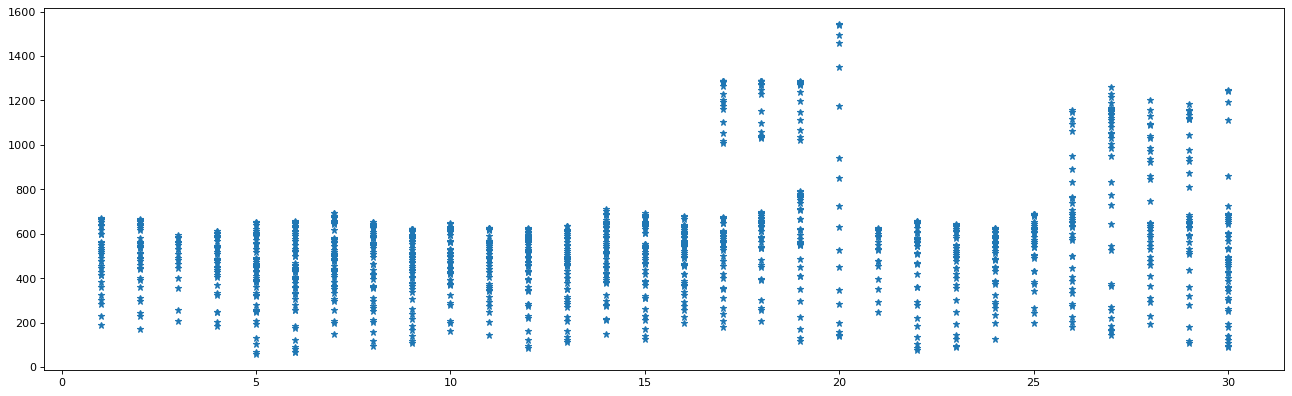

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

municipality_id = 0
plt.plot(df_sorted['Day'].loc[df_sorted['municipality_id'] == municipality_id], df_sorted['usage'].loc[df_sorted['municipality_id'] == municipality_id], "*")
plt.show()

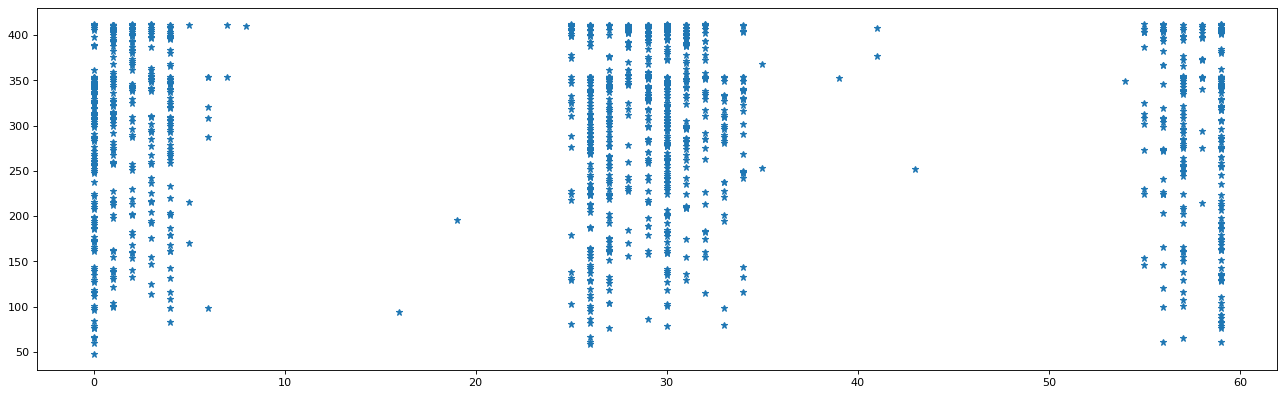

In [14]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

municipality_id = 1
plt.plot(df_sorted['Minute'].loc[df_sorted['municipality_id'] == municipality_id], df_sorted['usage'].loc[df_sorted['municipality_id'] == municipality_id], "*")
#plt.show()

In [15]:
#Normalize the data

df_sorted.usage = df_sorted.usage / df_sorted.usage.max() #3508

df_sorted.Month = df_sorted.Month / df_sorted.Month.max() # 8 

df_sorted.Day = df_sorted.Day / df_sorted.Day.max() # 30

df_sorted.Hour = df_sorted.Hour / df_sorted.Hour.max() # 16

df_sorted.Minute = df_sorted.Minute / df_sorted.Minute.max() # 59

In [16]:
# 2017-08-05 - 2017-08-19 test_train split with the spesific date

test = df_sorted[10391:]
train = df_sorted[:10390]

In [17]:
train

,municipality_id,usage,Year,Month,Day,Hour,Minute
0,9,0.129418,2017,0.75,0.133333,0.4375,1.000000
1,8,0.158495,2017,0.75,0.133333,0.4375,1.000000
2,4,0.310718,2017,0.75,0.133333,0.4375,1.000000
3,0,0.058153,2017,0.75,0.133333,0.4375,1.000000
4,7,0.204675,2017,0.75,0.133333,0.4375,1.000000
...,...,...,...,...,...,...,...
10383,5,0.032497,2017,1.00,0.066667,1.0000,0.542373
10382,3,0.271380,2017,1.00,0.066667,1.0000,0.542373
10381,9,0.178164,2017,1.00,0.066667,1.0000,0.542373
10380,7,0.333238,2017,1.00,0.066667,1.0000,0.542373


Municipality ID: 0 error:  0.0080331175435569
Municipality ID: 1 error:  0.00024657490220058757
Municipality ID: 2 error:  0.0007243947596292161
Municipality ID: 3 error:  0.008565807774132206
Municipality ID: 4 error:  0.04720545740572022
Municipality ID: 5 error:  0.0005469969986693185
Municipality ID: 6 error:  0.009179594194821254
Municipality ID: 7 error:  0.0032072189593541113
Municipality ID: 8 error:  0.004279198830855816
Municipality ID: 9 error:  0.0012053086075059477


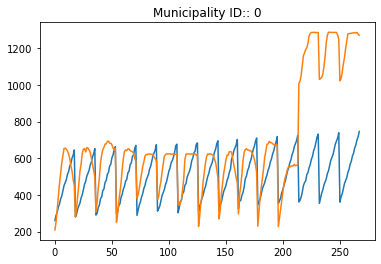

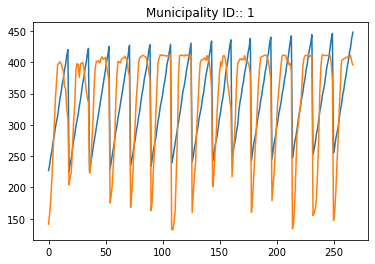

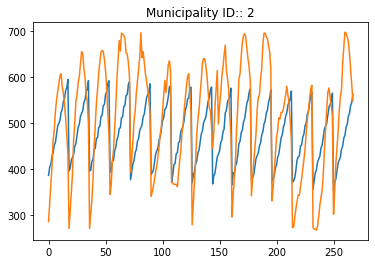

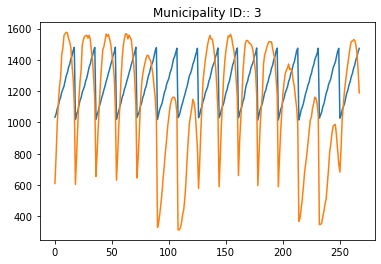

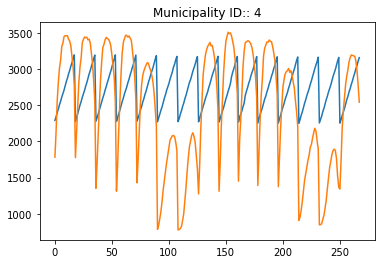

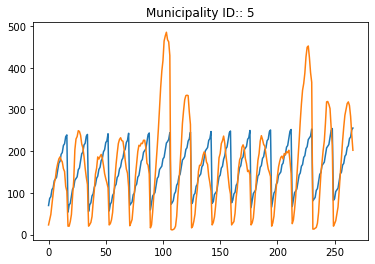

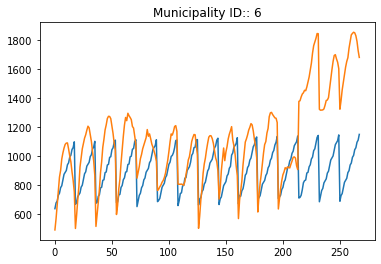

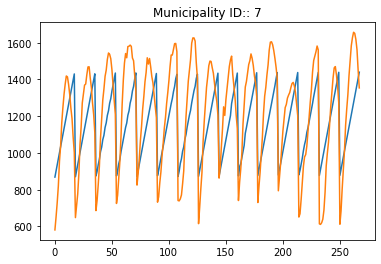

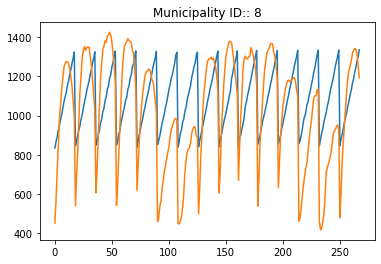

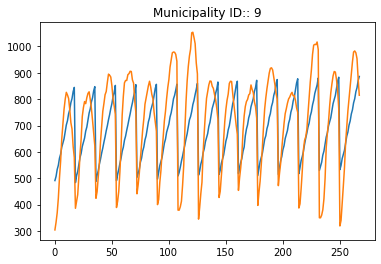

In [167]:
#With ML Models


from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


for i in range(10):
    municipality_id = i
    X_train = train.drop(["usage","Year"], axis = 1).loc[df_sorted['municipality_id'] == municipality_id].drop(["municipality_id"], axis=1)
    y_train = train["usage"].loc[df_sorted['municipality_id'] == municipality_id]
    
    X_test = test.drop(["usage","Year"], axis = 1).loc[df_sorted['municipality_id'] == municipality_id].drop(["municipality_id"], axis=1)
    y_test = test["usage"].loc[df_sorted['municipality_id'] == municipality_id]
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    result = lr.predict(X_test)
    result = pd.DataFrame(result)
    
    error = mean_squared_error(y_test, result)
    print("Municipality ID:", i, "error: ", error)
    
    predictions = lr.predict(X_test)*3508
    actual = y_test*3508
    
    figure()
    plt.title("Municipality ID:: " + str(municipality_id))
    plt.plot(predictions)
    plt.plot(actual.to_numpy())
    plt.legend(["Predictions", "Actual"])
    plt.show()

In [148]:
predictions = lr.predict(X_test)*3508
actual = y_test*3508

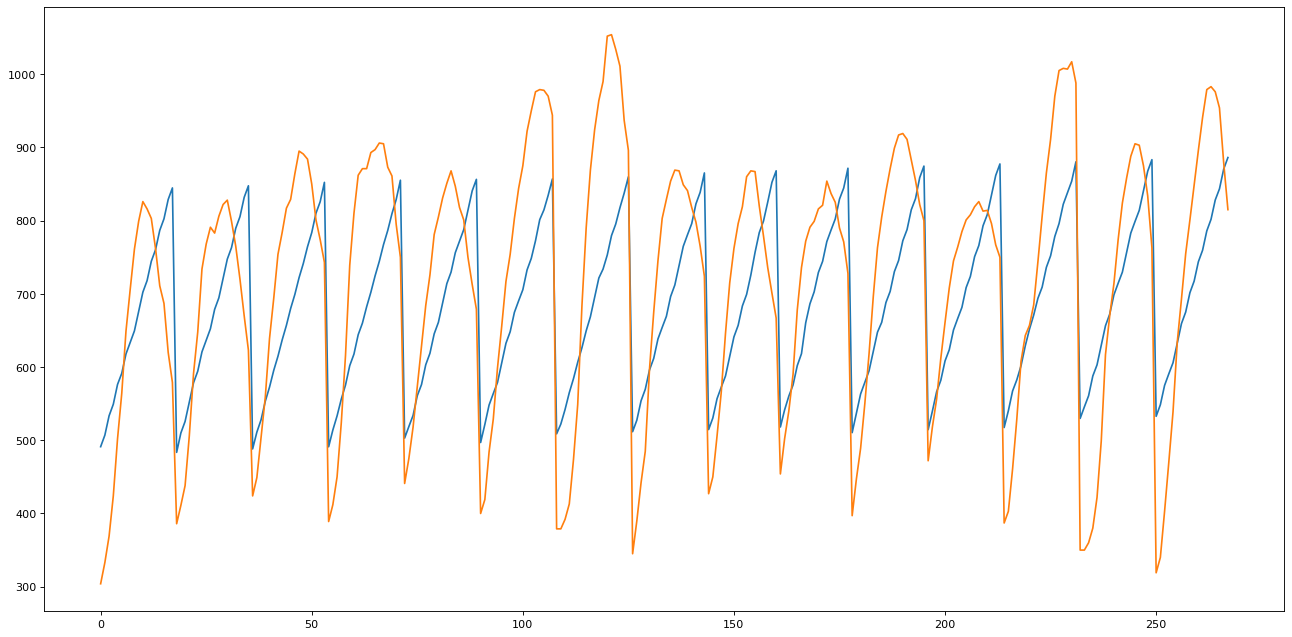

In [168]:
figure(figsize=(20, 10), dpi=80)

plt.plot(predictions)
plt.plot(actual.to_numpy())

In [230]:
# With Deep Learning Models

import keras
from keras.models import Sequential
from keras import losses
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras import regularizers
model = Sequential()
model.add(Dense(32,activation='selu',input_dim=4))
model.add(Dense(16,activation='selu'))
model.add(Dense(32,activation='selu'))
model.add(Dense(1,activation='selu'))
model.compile(loss='mean_squared_error',
             optimizer='Adam')


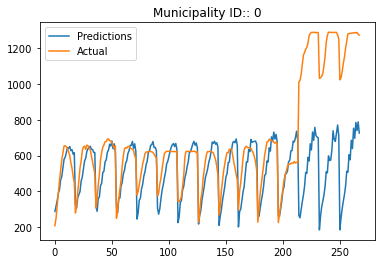

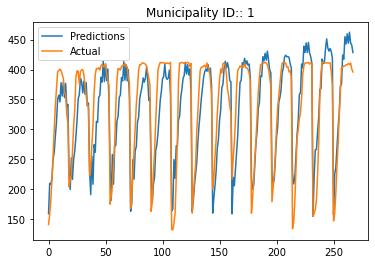

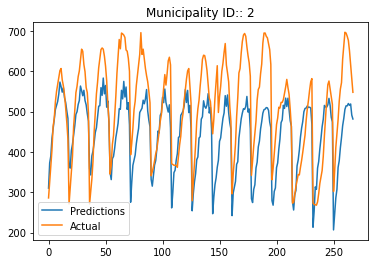

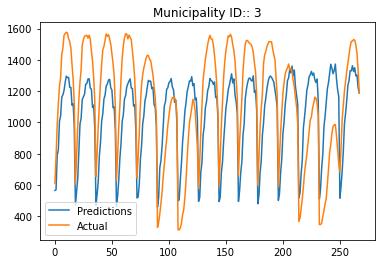

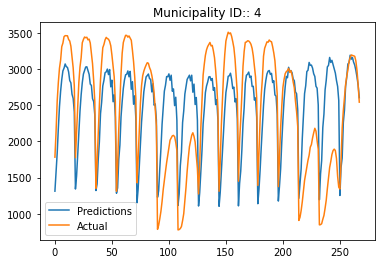

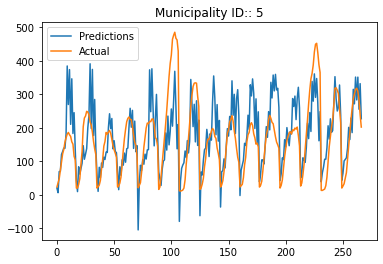

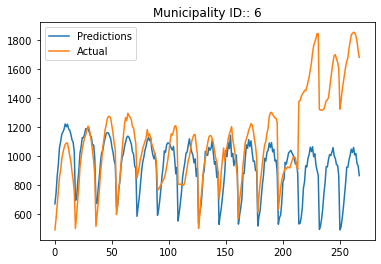

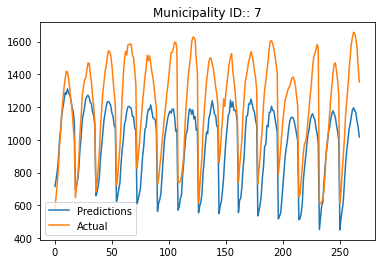

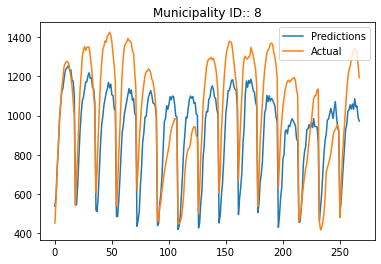

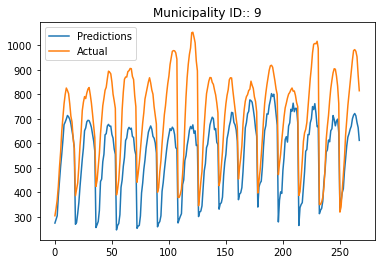

In [231]:
#model fitting and testing with interval of given dates

for i in range(10):
    municipality_id = i
    X_train = train.drop(["usage","Year"], axis = 1).loc[df_sorted['municipality_id'] == municipality_id].drop(["municipality_id"], axis=1)
    y_train = train["usage"].loc[df_sorted['municipality_id'] == municipality_id]

    X_test = test.drop(["usage","Year"], axis = 1).loc[df_sorted['municipality_id'] == municipality_id].drop(["municipality_id"], axis=1)
    y_test = test["usage"].loc[df_sorted['municipality_id'] == municipality_id]

    history = model.fit(X_train, y_train,
              batch_size=32,
              epochs=100,
              verbose=0)

    predictions = model.predict(X_test)*3508
    actual      = y_test*3508

    figure()
    plt.title("Municipality ID:: " + str(municipality_id))
    plt.plot(predictions)
    plt.plot(actual.to_numpy())
    plt.legend(["Predictions", "Actual"])
    plt.show()


In [232]:
predictions = model.predict(X_test)*3508
actuals     = y_test*3508

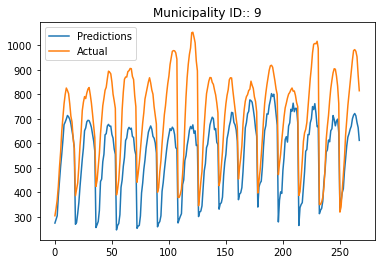

In [233]:
plt.title("Municipality ID:: " + str(municipality_id))

plt.plot(predictions)
plt.plot(actual.to_numpy())
plt.legend(["Predictions", "Actual"])
plt.show()